# 의사결정나무(Decision Tree )

## 개요

- 데이터를 잘 분류할 수 있는 질문을 던져 가며 대상을 좁혀가는 '스무고개'와 비슷한 형식의 알고리즘.
- 추론결과을 위해 분기해 나가는 구조가 Tree 구조와 같기 때문에 Decision Tree 라고 한다.
    - 노드안의 원소들의 불순도 최대한 감소하는 방향(최대한 한 class의 값들만 있는 상태)으로 조건을 만들어 학습을 진행한다.
    - 하위노드는 yes/no 두 개로 분기 된다.

- 머신러닝 모델들 중 몇 안되는 White box 모델로 추론 결과에 대한 해석이 가능하다.
- 과대적합(Overfitting)이 발생하기 쉽다.
- 앙상블기반 알고리즘인 랜덤 포레스트와 많은 부스팅(Boosting)기반 앙상블 모델들의 기반 알고리즘으로 사용된다.

> ### 순도(purity)/불순도(impurity)
>    - 서로 다른 종류의 값들이 섞여 있는 비율
>    - 한 종류(class)의 값이 많을 수록 순도가 높고 불순도는 낮다.

## 용어
- Root Node : 시작 node
- Decision Node (Intermediate Node): 중간 node
- Leaf Node(Terminal Node) : 마지막 단계의 노드로 최종결과를 가진다.

## 과대적합(Overfitting) 문제
- 모든 데이터셋이 모두 잘 분류 되어 불순도가 0이 될때 까지 분기해 나간다.
- Root에서 부터 하위 노드가 많이 만들어 질 수록 모델이 복잡해져 과대적합이 발생할 수 있다.
- 과대적합을 막기 위해서는 적당한 시점에 하위노드가 더이상 생성되지 않도록 해야 한다.
    - 하위 노드가 더이상 생성되지 않도록 하는 것을 **가지치기(Pruning)**라고 한다.
    

## 하이퍼파라미터
- 가지치기 관련 하이퍼파라미터
    - max_depth : 최대 깊이
    - max_leaf_nodes : 생성될 최대 Leaf Node 개수 제한
    - min_samples_leaf: 가지를 칠 최소 sample 수. sample 수가 지정한 값보다 작으면 불순도와 상관없이 가지를 치지 않는다.
- criterion (크라이티어리언-판단기준)
    - 불순도 계산 방식을 하이퍼파라미터
    - gini (기본값)
    - entropy

## Feature(컬럼) 중요도 조회
- **feature_importances_** 속성
    - 모델을 만들때 각 Feature의 중요도를 반환
    - input data 에서 중요한 feature를 찾기 위해 decision tree를 이용하기도 한다.
    - 학습이 끝난 모델에서 호출

## Wine Dataset을 이용한 color 분류

- https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- features
    - 와인 화학성분들
        - fixed acidity : 고정 산도
        - volatile acidity : 휘발성 산도
        - citric acid : 시트르산
        - residual sugar : 잔류 당분
        - chlorides : 염화물
        - free sulfur dioxide : 자유 이산화황
        - total sulfur dioxide : 총 이산화황
        - density : 밀도
        - pH : 수소 이온 농도
        - sulphates : 황산염
        - alcohol : 알콜
    - quality: 와인 등급 (A>B>C)
- target - color
    - 0: white, 1: red

In [1]:
import pandas as pd
import numpy as np

wine = pd.read_csv('data/wine.csv')
wine.shape

(6497, 13)

In [2]:
# DataFrame에서 Feature, label 분리
y = wine['color']  #label(target)
X = wine.drop(labels='color', axis=1)

##### 전처리
- 범주형 타입인 **quality**에 대해 Label Encoding 처리
    - DecisionTree 계열 모델 - Label Encoding 처리 (연속형-Feature scaling을 하지 않는다.)
    - 나머지 모델 - One hot encoding (연속형-Feature scaling 처리)

> 예측을 위해서 전체 Feature들을 묶어서 연산을 하는 경우 One Hot encoding(범주형), Feature scaling(연속형)

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['quality'] = encoder.fit_transform(X['quality'])

print(encoder.classes_)

['A' 'B' 'C']


##### train/test set 분리

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [6]:
X_train.shape, X_test.shape

((5197, 12), (1300, 12))

##### DecisionTreeClassifier 생성 ,학습, 추론

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
# Label(class)를 예측
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

# Class별 확률을 예측
proba_train = tree.predict_proba(X_train)[:, 1] # [:, 1] => 양성(1)에 대한 예측확률
proba_test = tree.predict_proba(X_test)[:, 1]

##### Graphviz를 이용해 tree구조 시각화

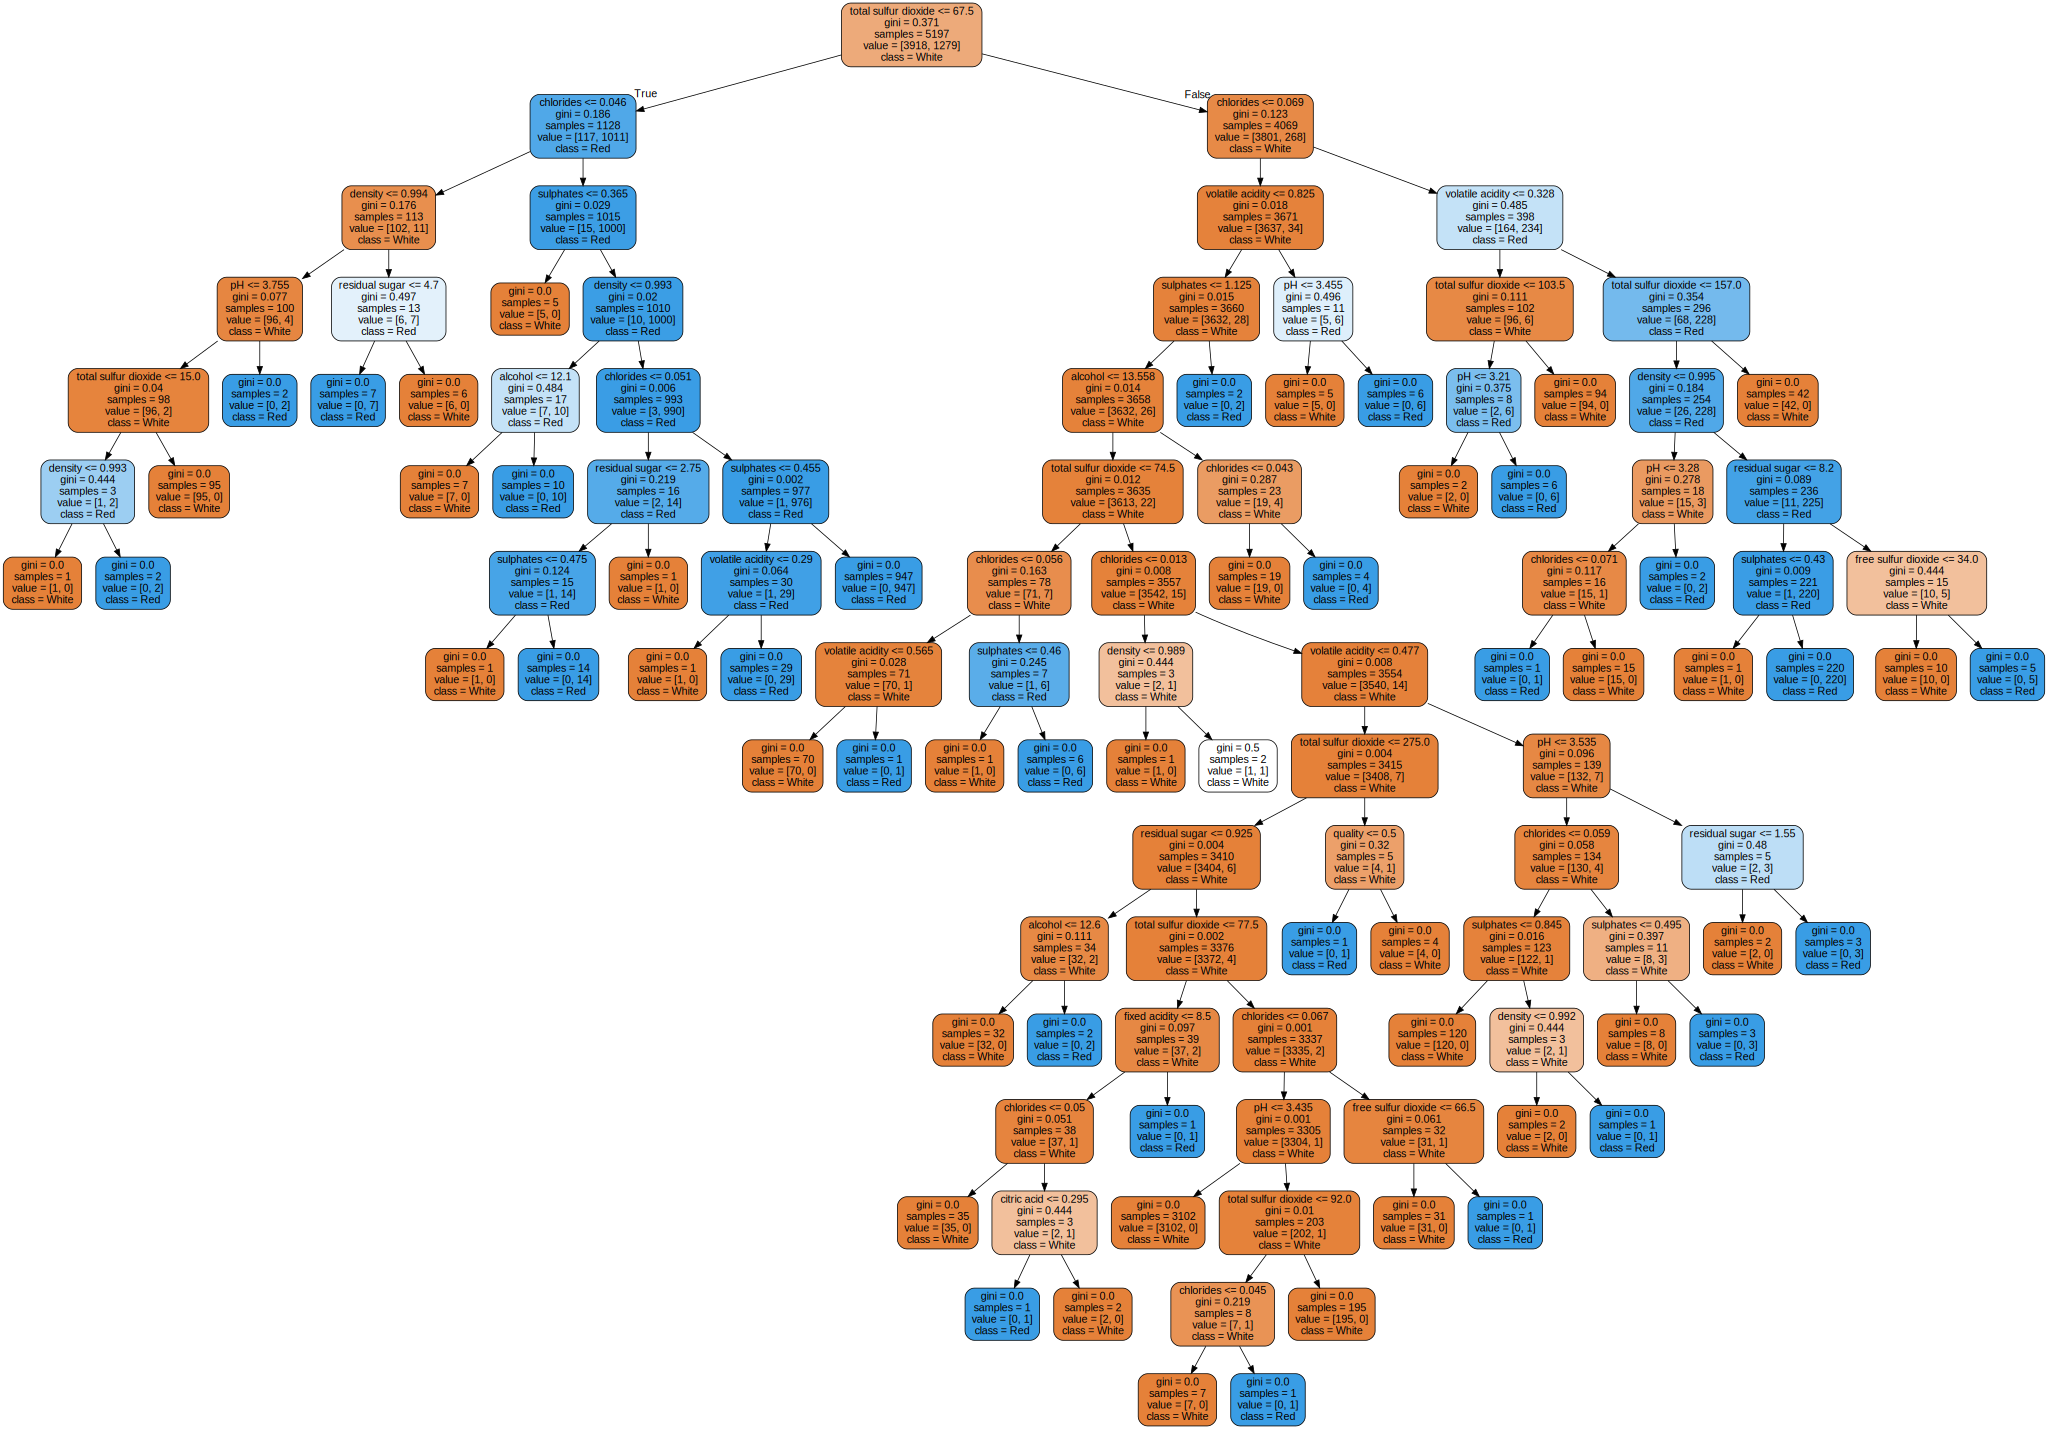

In [9]:
# 트리 구조 시각화 - graphviz 이용
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(tree,    #학습한 모델
                               out_file=None, 
                               feature_names=X.columns, 
                               class_names=["White", "Red"], 
                               rounded=True, filled=True))

graph

##### 평가

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

confusion_matrix(y_train, pred_train)

array([[3918,    0],
       [   1, 1278]], dtype=int64)

In [11]:
confusion_matrix(y_test, pred_test)

array([[976,   4],
       [ 14, 306]], dtype=int64)

In [12]:
print('정확도')
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

정확도


(0.9998075812969021, 0.9861538461538462)

In [13]:
print("roc-auc score")
roc_auc_score(y_train, proba_train), roc_auc_score(y_test, proba_test)

roc-auc score


(0.9999999002219463, 0.9776403061224489)

In [14]:
report = classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.96      0.97       320

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300



##### Feature 중요도 조회
- DecisionTree를 데이터 전처리 단계에서 사용해서 추론에 도움이 되는 중요한 Feature를 선택하는 데 사용한다. (중요도가 낮은 Feature들을 걸러내는데 사용)

In [15]:
# 각 Feature가 데이터를 추론하는데 얼마나 중요한지(영향을 많이 주는지)를 조회.
fi = tree.feature_importances_
fi.shape 

(12,)

In [17]:
fi_s = pd.Series(fi, index=X.columns)

fi_s.sort_values(ascending=False)

total sulfur dioxide    0.668726
chlorides               0.219620
volatile acidity        0.045482
density                 0.018161
sulphates               0.012631
residual sugar          0.011951
pH                      0.009590
alcohol                 0.006894
free sulfur dioxide     0.004464
fixed acidity           0.000959
quality                 0.000830
citric acid             0.000692
dtype: float64

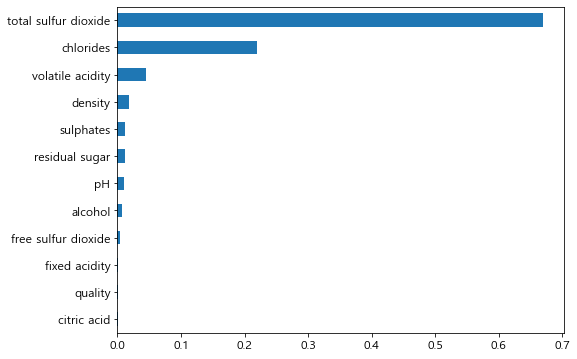

In [18]:
import matplotlib.pyplot as plt
fi_s.sort_values().plot(kind='barh', figsize=(8,6))
plt.show()

In [19]:
tree.get_n_leaves()  # 학습된 모델의 leaf 노드의 개수를 반환

58

In [20]:
tree.get_depth()  # 학습된 모델의 max_depth를 반환

15

# Ensemble(앙상블)
- 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 해결하는 방식
- 개별로 학습한 여러 모델을 조합해 과적합을 막고 일반화 성능을 향상시킬 수 있다.
- 개별 모델의 성능이 확보되지 않을 때 성능향상에 도움될 수 있다.

## 앙상블의 종류

### 1. 투표방식
- 여러개의 추정기(Estimator)가 낸 결과들을 투표를 통해 최종 결과를 내는 방식
- 종류
    1. Bagging - 같은 유형의 알고리즘들을 조합하되 각각 학습하는 데이터를 다르게 한다. 
        - Random Forest가 Bagging을 기반으로 한다.
    2. Voting - 서로 다른 종류의 알고리즘들을 결합한다.
    

### 2. 부스팅(Boosting)    
- 약한 학습기(Weak Learner)들을 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만든다.
- 각 약한 학습기들은 순서대로 일을 하며 뒤의 학습기들은 앞의 학습기가 찾지 못한 부분을 추가적으로 찾는다.

# Random Forest (랜덤포레스트)
- Bagging 방식의 앙상블 모델
- Decision Tree를 기반으로 한다. 
- 다수의 Decision Tree를 사용해서 성능을 올린 앙상블 알고리즘의 하나
    - N개의 Decision Tree 생성하고 입력데이터를 각각 추론하게 한 뒤 가장 많이 나온 추론결과를 최종결과로 결정한다.
- 처리속도가 빠르며 성능도 높은 모델로 알려져 있다.  

> - Random: 학습할 때 Train dataset을 random하게 sampling한다.
> - Forest: 여러개의 (Decision) Tree 모델들을 앙상블한다.

- **랜덤포레스트의 절차**
    - 객체 생성시 Decision Tree의 개수, Decision Tree에 대한 하이퍼파라미터들 등을 받아서 생성한다.
        - 모든 DecisionTree들은 같은 구조를 가지게 한다.
    - 학습시 모든 Decision Tree들이 서로 다른 데이터셋으로 학습하도록 Train dataset으로 부터 생성한 DecisionTree개수 만큼  sampling 한다.
        - **부트스트랩 샘플링**(중복을 허용하면서 랜덤하게 샘플링하는 방식)으로 데이터셋을 준비한다. (총데이터의 수는 원래 데이터셋과 동일 하지만 일부는 누락되고 일부는 중복된다.)
        - Sampling된 데이터셋들은  **전체 피처중 일부만** 랜덤하게 가지게 한다.
    - 각 트리별로 예측결과를 내고 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과를 낸다. 
    - 회귀의 경우는 예측 결과의 평균을 낸다.

- **주요 하이퍼파라미터**
    - n_estimators
        - DecisionTree 모델의 개수
        - 학습할 시간과 메모리가 허용하는 범위에서 클수록 좋다. 
    - max_features
        - 각 트리에서 선택할 feature의 개수
        - 클수록 각 트리간의 feature 차이가 크고 작을 수록 차이가 적게 나게 된다.
    - max_depth, min_samples_leaf 등
        - DecisionTree의 하이퍼파라미터들
        - Tree의 최대 깊이, 가지를 치기 위한 최소 샘플 수 등 결정 트리에서 과적합을 막기 위한 파라미터들을 랜덤 포레스트에 적용할 수 있다.

### 와인 데이터셋 color 분류

In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('data/wine.csv')
y = data['color']
X = data.drop(columns=['color', 'quality'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
X_train.shape, X_test.shape

((4872, 11), (1625, 11))

##### RandomForestClassifier 생성, 학습, 추론

In [22]:
rf = RandomForestClassifier(n_estimators=500,  # DecisionTree모델의 개수
                            max_depth=5,  # DecisionTree들의 하이퍼파라미터인 max_depth를 5로 설정
                            random_state=0,
                            max_features=10, #10개의 컬럼만 사용한다. (sampling시 random하게 선택)
                            n_jobs=-1)

rf.fit(X_train, y_train) #학습 - 500개의 DecisionTree 모델들을 학습(X_train, y_train을 이용해서)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [23]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

proba_train = rf.predict_proba(X_train)
proba_test = rf.predict_proba(X_test)

##### 평가

In [24]:
print(accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test))

print(roc_auc_score(y_train, proba_train[:,1]), roc_auc_score(y_test, proba_test[:, 1]))

0.9950738916256158 0.9858461538461538
0.999067650303922 0.9965969387755103


##### Feature importance (Feature 중요도)

In [25]:
fi = pd.Series(rf.feature_importances_, index=X_train.columns)
fi.sort_values(ascending=False)

total sulfur dioxide    0.514644
chlorides               0.371917
volatile acidity        0.037458
density                 0.027322
sulphates               0.016259
fixed acidity           0.010526
pH                      0.009398
residual sugar          0.007695
citric acid             0.001948
alcohol                 0.001896
free sulfur dioxide     0.000939
dtype: float64

<AxesSubplot:>

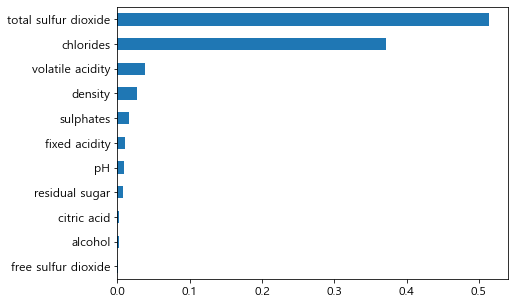

In [26]:
fi.sort_values().plot(kind='barh', figsize=(7,5)) 